In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import warnings

In [4]:
def f(x): 
    return 0.2 + np.cos(8*(x-1))

In [6]:
plt.figure(figsize=(10,5), dpi = 150)
plt.style.use("Solarize_Light2")
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

<Figure size 1500x750 with 0 Axes>

In [8]:
def generate_data(n_samples=100): 
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.3 * np.random.randn(n_samples)
    return x, y

/var/folders/1z/w9ftp6517j94zsn4yj4qy1lc0000gn/T/ipykernel_2215/1260928445.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, s=50, edgecolors = "k", alpha = 0.5, cmap = plt.cm.coolwarm)


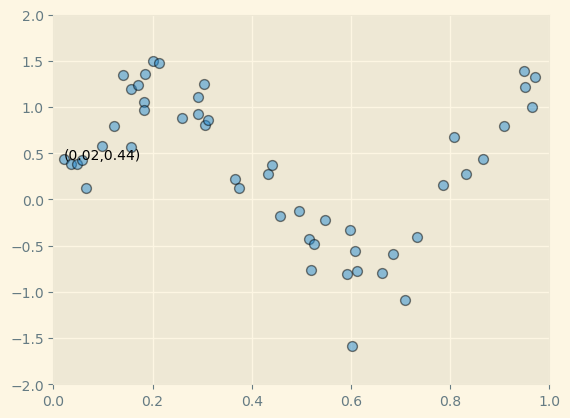

In [10]:
n_samples = 50 
x, y = generate_data(n_samples)

plt.figure()
plt.scatter(x, y, s=50, edgecolors = "k", alpha = 0.5, cmap = plt.cm.coolwarm) 
plt.text(x[0], y[0], "(" + str(np.round(x[0],2)) + "," + str(np.round(y[0],2)) + ")")
plt.xlim(0,1)
plt.ylim(-2,2)
plt.show()

In [12]:
y

array([ 0.44,  0.38,  0.39,  0.42,  0.12,  0.58,
        0.8 ,  1.34,  1.2 ,  0.56,  1.24,  1.05,
        0.97,  1.36,  1.5 ,  1.48,  0.89,  0.93,
        1.11,  1.25,  0.81,  0.86,  0.22,  0.13,
        0.28,  0.38, -0.17, -0.12, -0.43, -0.76,
       -0.48, -0.22, -0.8 , -0.33, -1.58, -0.55,
       -0.77, -0.79, -0.59, -1.09, -0.41,  0.16,
        0.68,  0.27,  0.44,  0.8 ,  1.39,  1.22,
        1.  ,  1.33])

In [14]:
def fit_poly(x, y, deg = 1): 
    polynomial_features = PolynomialFeatures(degree = deg)
    linear_regression = LinearRegression()
    model = Pipeline([
        ("poly_feat", polynomial_features), 
        ("lin_reg", linear_regression)
    ])
    model.fit(x[:,None],y)
    return model

In [16]:
degrees = [2,4,5,7,10,20]

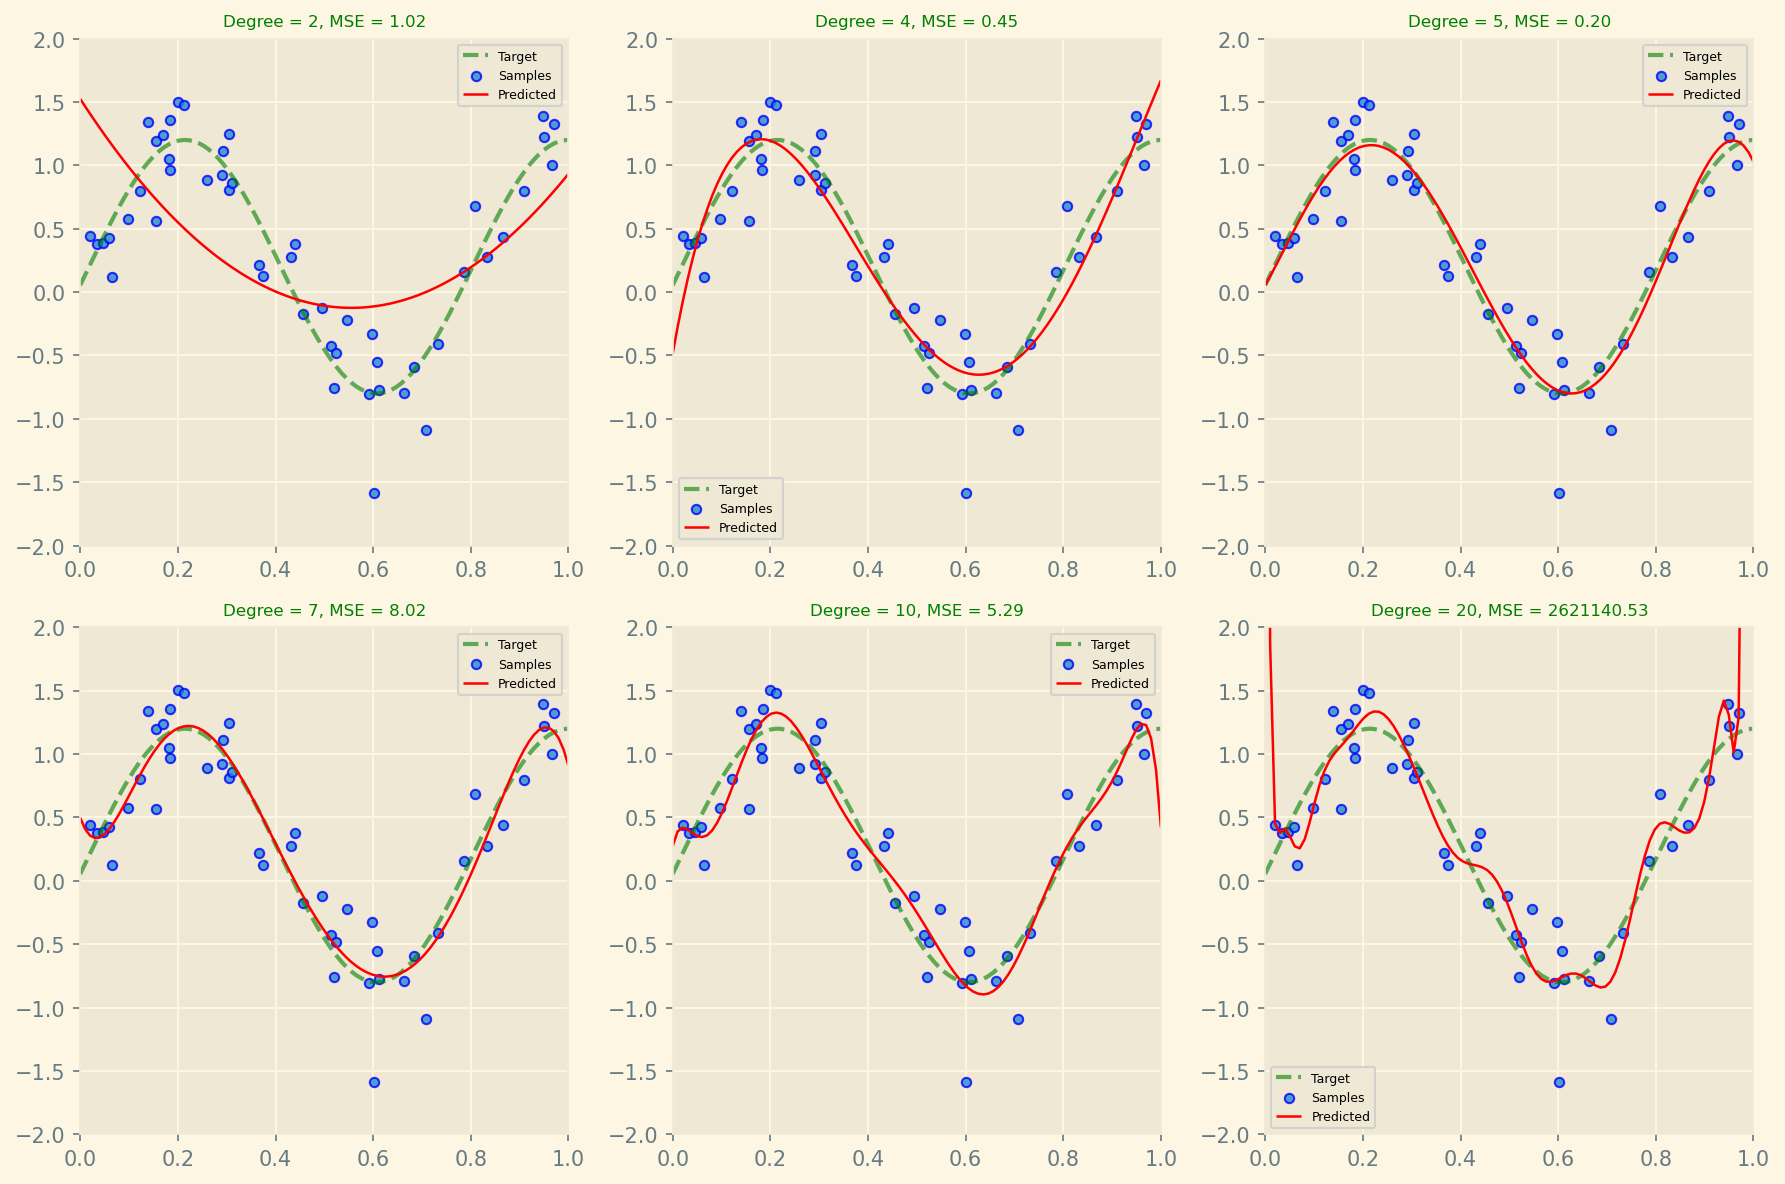

In [18]:
plt.figure(figsize=(12, 8), dpi=150)
for d in degrees: 
    model = fit_poly(x, y, deg=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # Subplot
    plt.subplot(2, 3, degrees.index(d) + 1)
    
    # Test data and predictions
    x_test = np.linspace(0, 1, 100)
    y_pred = model.predict(x_test[:, None])
    
    # Plot target function
    plt.plot(x_test, f(x_test), "g--", label="Target", alpha=0.6)
    
    # Plot samples
    plt.scatter(x, y, s=20, edgecolor='b', alpha=0.8, label="Samples")
    
    # Plot model predictions
    plt.plot(x_test, y_pred, 'r', lw=1.2, label="Predicted")
    
    # Axes limits
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    
    # Title with MSE
    plt.title(
        f"Degree = {d}, MSE = {-scores.mean():.2f}", 
        fontsize=8, 
        color='green'
    )

    # Add legend
    plt.legend(fontsize=6)

# Adjust layout
plt.tight_layout()
plt.show()

In [20]:
def plot_coef(weight):
    plt.figure()
    plt.bar(np.arange(1, len(weight)+1), height=np.abs(weight), color="g")
    plt.show()

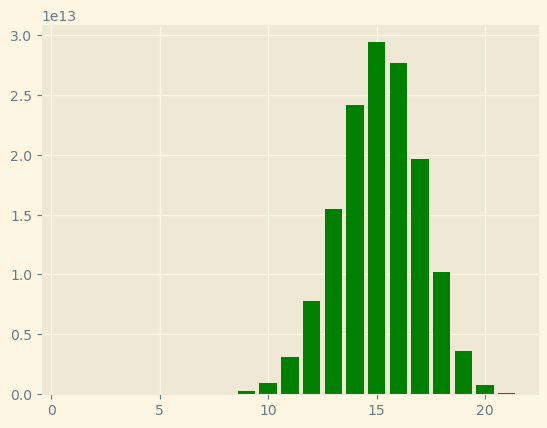

In [22]:
plot_coef(model.steps[1][1].coef_)

### L2-Regularizarion (Ridge)

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} W_j^2$$

In [28]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # create and fit the model
    L2_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("L2_regression", L2_regression)])
    model.fit(x[:, None], y)
    return model

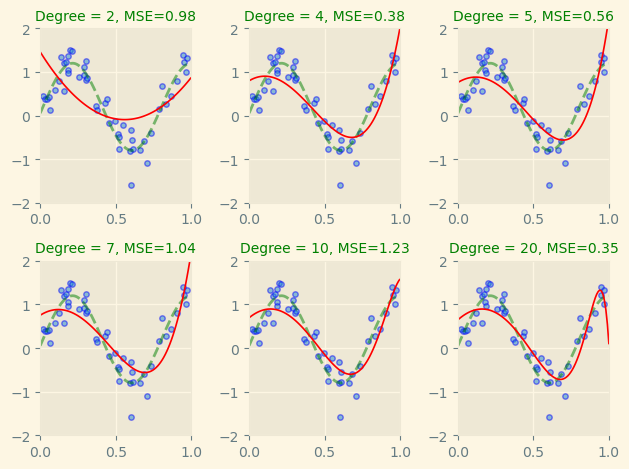

In [30]:
lmbda = 0.01
plt.figure()
for d in degrees:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 3, degrees.index(d) + 1)
    plt.tight_layout()

    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10, color="green")

plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\l'
<>:18: SyntaxWarning: invalid escape sequence '\l'
/var/folders/1z/w9ftp6517j94zsn4yj4qy1lc0000gn/T/ipykernel_2215/2754385251.py:18: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")


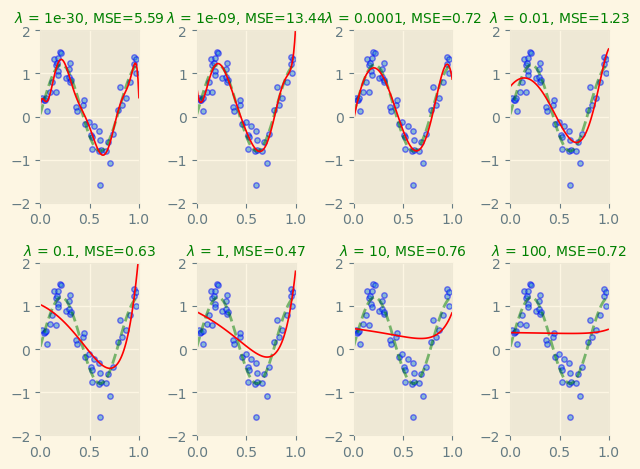

In [32]:
#The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
plt.figure()
d = 10
for lmbda in lmbdas:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")

plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\l'
<>:17: SyntaxWarning: invalid escape sequence '\l'
/var/folders/1z/w9ftp6517j94zsn4yj4qy1lc0000gn/T/ipykernel_2215/2671574798.py:17: SyntaxWarning: invalid escape sequence '\l'
  ax.set_title("degree = %d, $\lambda$ = %s, Loss (MSE) = %.2f" % (d, lmbda, -scores.mean()), fontsize=12, color="green")


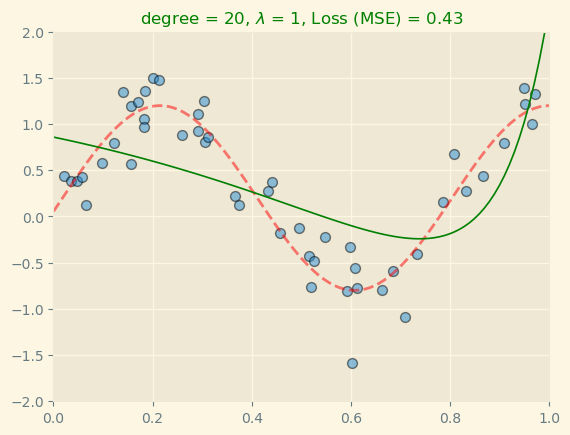

In [36]:
d = 20
lmbda = 1 #0.0001

# fit
model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("degree = %d, $\lambda$ = %s, Loss (MSE) = %.2f" % (d, lmbda, -scores.mean()), fontsize=12, color="green")
plt.show()

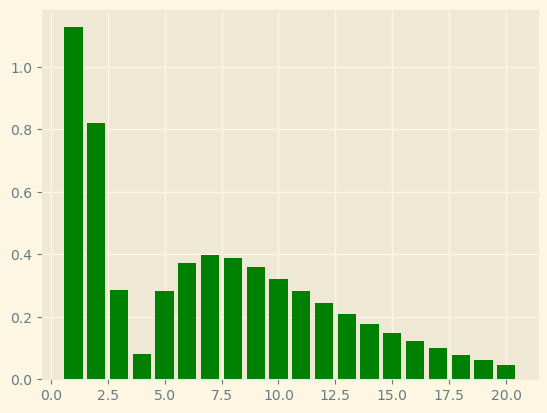

In [38]:
plot_coef(model.steps[1][1].coef_)

### L1-Regularizarion (Lasso)

$$J(W) = \frac{1}{2m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |W_j|$$

In [43]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):

    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree)
    L1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("L1_reg", L1_regression)])

    # create and fit the model
    model.fit(x[:, None], y)
    return model

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.767e+00, tolerance: 2.923e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+00, tolerance: 2.915e-03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.717e+00, toler

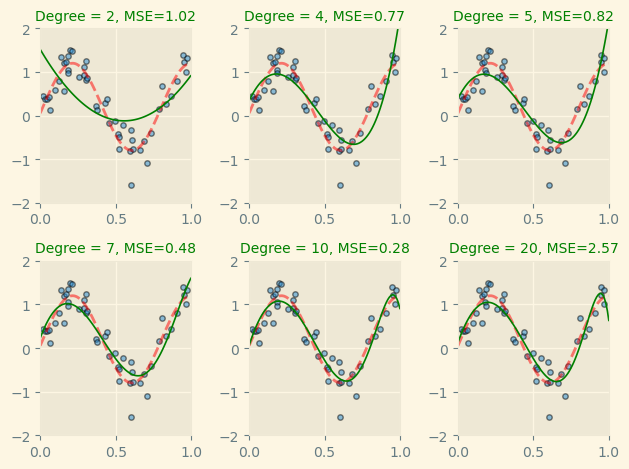

In [45]:
lmbda = 1e-4
plt.figure()

for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 3, degrees.index(d) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10, color="green")
warnings.filterwarnings(action="ignore")
plt.show();

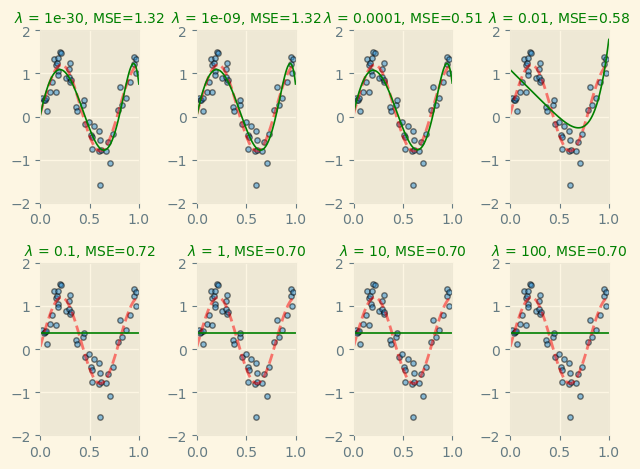

In [49]:
#The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
d=10
plt.figure()

for lmbda in lmbdas:
    model = fit_poly_L1_reg(degree=11, lmbda=lmbda)

    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")

warnings.filterwarnings(action="ignore")
plt.show()

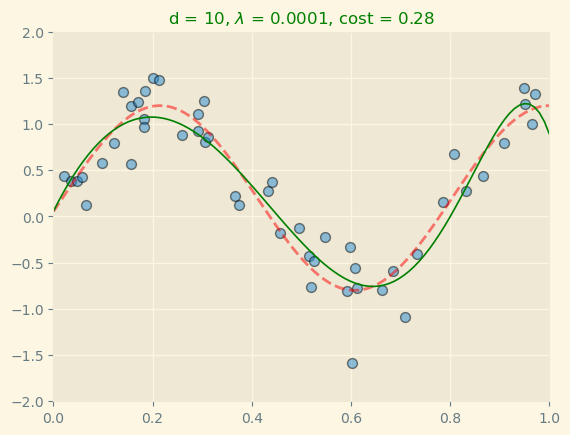

In [53]:
degree = 10
lmbda = 1e-4
# fit
model = fit_poly_L1_reg(degree=degree, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)
x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12, color="green")
plt.show()

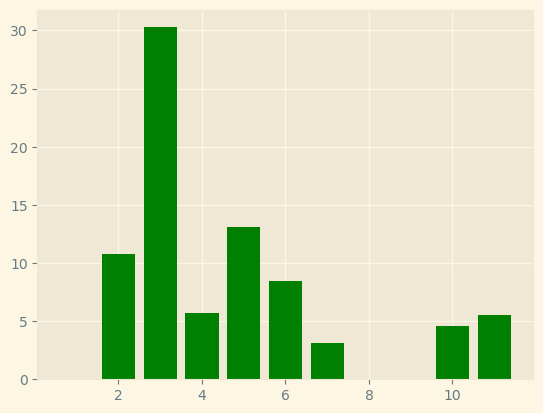

In [55]:
plot_coef(model.steps[1][1].coef_)

In [57]:
lmbdas = [1e-3, 1e-2, 1e-1]
degrees = [3, 10, 20]

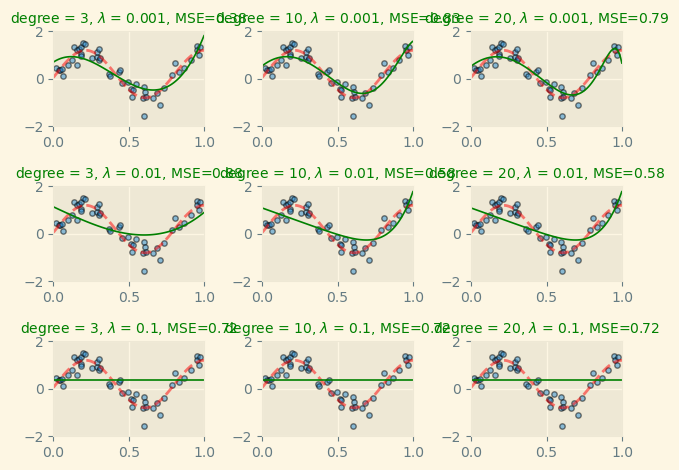

In [59]:
plt.figure()

for lmbda in lmbdas:
  for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)

    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

    # plot data and model
    plt.subplot(3, 3, (3*(lmbdas.index(lmbda)))+degrees.index(d)+1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("degree = {}, $\lambda$ = {}, MSE={:.2f}".format(d, lmbda, -scores.mean()), fontsize=10, color="green")

warnings.filterwarnings(action="ignore")
plt.show()

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [63]:
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

In [65]:
hyp_pars = {'polynomialfeatures__degree': [3,4,5,6,7,8,9,10],
            'ridge__alpha': [1e-4, 1e-3, 1e-2, 0.1]}

gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=10, scoring='neg_mean_squared_error')
gridsearch.fit(x[:,None], y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9,
                                                        10],
                         'ridge__alpha': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [67]:
best_model = gridsearch.best_estimator_
best_parameters = gridsearch.best_params_
print(best_parameters)

{'polynomialfeatures__degree': 7, 'ridge__alpha': 0.0001}


In [69]:
# Placeholder pipeline with 'regressor' step
pipeline = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('regressor', Ridge())  # Placeholder, will be swapped out by GridSearchCV
])

# Hyperparameters grid
hyp_pars = {
    'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9, 10],
    'regressor': [Ridge(), Lasso()],
    'regressor__alpha': [1e-4, 1e-3, 1e-2, 0.1]
}

gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=10, scoring='neg_mean_squared_error')
gridsearch.fit(x[:, None], y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('regressor', Ridge())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9,
                                                        10],
                         'regressor': [Ridge(), Lasso()],
                         'regressor__alpha': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [71]:
best_model = gridsearch.best_estimator_
best_parameters = gridsearch.best_params_
print(best_parameters)

{'polynomialfeatures__degree': 7, 'regressor': Ridge(), 'regressor__alpha': 0.0001}
